# Case Study - Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

**Major Steps Involved:**
1. **Text Data Visualisation**
2. **Text Data Preprocessing**
3. **Text Data To Numerical Vector Conversion using:**
  - **Word2Vec**
  - **Pretrained GloVe**
  - **Pretrained BERT**

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preparation
    - Train Test Split
    - Data Preprocessing (special characters, stop words, lower case, stemming, etc)
    - Converting text to numerical vector using Word2Vec, Pretrained GloVe and BERT
    - Preprocessing Test Data
4. Training on Train Data
5. Predictions on Test Data
6. Model Evaluation

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [3]:
df = pd.read_csv('Prob.csv')

df.head()

,Unnamed: 0,Title,Pros,Cons,Status
0,0,"Pretty good, Not complaining.",Its a very nice location. Right next to a subw...,"The floors and walls are very thin, so you can...",published
1,1,Sweet lil spot,Location\nCommunity\nDeal for location,Not best windows/natural light,published
2,2,Avoid if you can,The neighbors are amazing \nStreet is clean an...,Management is poor at responding\nIssues are p...,published
3,3,They care about tenants,Super keeps the building clean. Apartments are...,Can hear everything from apartment above,published
4,6,Nice building,Clean and nice coop,Roof access restricted,published


In [4]:
df.shape

(53642, 5)

### Exploratory Data Analysis

In [5]:
df['Status'].value_counts()

published    47192
rejected      6450
Name: Status, dtype: int64

In [6]:
df['Status'].value_counts(normalize=True)

published    0.879758
rejected     0.120242
Name: Status, dtype: float64

<Axes: xlabel='Status', ylabel='count'>

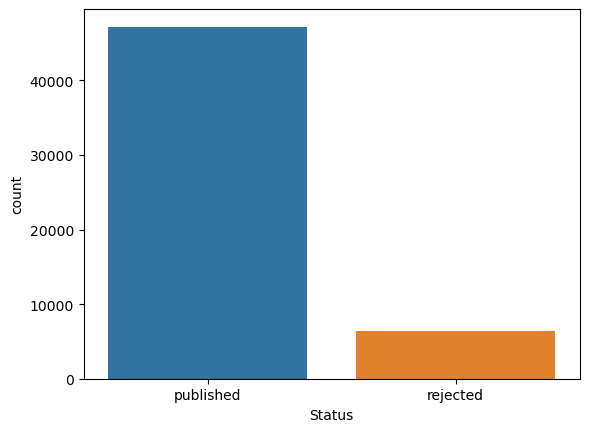

In [7]:
sns.countplot(x='Status', data=df)

### Data Preparation - Split the data into train and test set

In [8]:
df.columns

Index(['Unnamed: 0', 'Title', 'Pros', 'Cons', 'Status'], dtype='object')

In [9]:
df = df.drop('Unnamed: 0', axis=1)

df.head()

,Title,Pros,Cons,Status
0,"Pretty good, Not complaining.",Its a very nice location. Right next to a subw...,"The floors and walls are very thin, so you can...",published
1,Sweet lil spot,Location\nCommunity\nDeal for location,Not best windows/natural light,published
2,Avoid if you can,The neighbors are amazing \nStreet is clean an...,Management is poor at responding\nIssues are p...,published
3,They care about tenants,Super keeps the building clean. Apartments are...,Can hear everything from apartment above,published
4,Nice building,Clean and nice coop,Roof access restricted,published


In [10]:
y = df['Status']
X = df[['Cons']]

In [11]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,Cons
47819,Management could be more responsive but they’r...
17271,"Can’t use the back entrance, elevators go out ..."
48646,Bed Bugs & Cockroach Ridden
52234,MICE INFESTATION - HORRIBLE MANAGEMENT
51822,The building is a chronic MESS. From broken l...


In [13]:
X_train.shape

(42913, 1)

### Data Prepration - Text Preprocessing

In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [15]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhilashpatelrouthu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhilashpatelrouthu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abhilashpatelrouthu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [17]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [18]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [19]:
# %%timeit

# # Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

# # 2min 35 sec approx run time

In [20]:
# !pip install tqdm

In [21]:
from tqdm import tqdm, tqdm_notebook

In [22]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [24]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['Cons'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|████████████████████████████████████| 42913/42913 [01:01<00:00, 695.06it/s]


,0,1
47819,manag could respons nice get ahold,6
17271,use back entranc elev go servic often valu goo...,28
48646,bed bug cockroach ridden,4
52234,mice infest horribl manag,4
51822,build chronic mess broken lock door light inte...,56


In [25]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
47819,manag could respons nice get ahold,6
17271,use back entranc elev go servic often valu goo...,28
48646,bed bug cockroach ridden,4
52234,mice infest horribl manag,4
51822,build chronic mess broken lock door light inte...,56


In [26]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,Cons,clean_text_stem,text_length_stem
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56


In [27]:
temp_df = X_train['Cons'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|████████████████████████████████████| 42913/42913 [00:57<00:00, 741.65it/s]


,0,1
47819,management could responsive nice get ahold,6
17271,use back entrance elevator go service often va...,28
48646,bed bug cockroach ridden,4
52234,mouse infestation horrible management,4
51822,building chronic mess broken lock door lightin...,56


In [28]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
47819,management could responsive nice get ahold,6
17271,use back entrance elevator go service often va...,28
48646,bed bug cockroach ridden,4
52234,mouse infestation horrible management,4
51822,building chronic mess broken lock door lightin...,56


In [29]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,Cons,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6,management could responsive nice get ahold,6
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28,use back entrance elevator go service often va...,28
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4,bed bug cockroach ridden,4
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4,mouse infestation horrible management,4
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56,building chronic mess broken lock door lightin...,56


In [30]:
X_train.head()

,Cons,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6,management could responsive nice get ahold,6
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28,use back entrance elevator go service often va...,28
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4,bed bug cockroach ridden,4
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4,mouse infestation horrible management,4
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56,building chronic mess broken lock door lightin...,56


### Creating the WordCloud for published reviews

In [31]:
# !pip install wordcloud

In [32]:
from wordcloud import WordCloud

In [33]:
y_train

47819    published
17271    published
48646    published
52234    published
51822    published
           ...    
11284    published
44732    published
38158    published
860      published
15795    published
Name: Status, Length: 42913, dtype: object

In [38]:
spam_df = X_train.loc[y_train=='published', :]

spam_df.head()

,Cons,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6,management could responsive nice get ahold,6
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28,use back entrance elevator go service often va...,28
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4,bed bug cockroach ridden,4
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4,mouse infestation horrible management,4
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56,building chronic mess broken lock door lightin...,56


In [39]:
words = ' '.join(spam_df['clean_text_lemma'])

print(words[:100])

management could responsive nice get ahold use back entrance elevator go service often value good un


In [40]:
spam_df = X_train.loc[y_train=='published', :]

words = ' '.join(spam_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [41]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

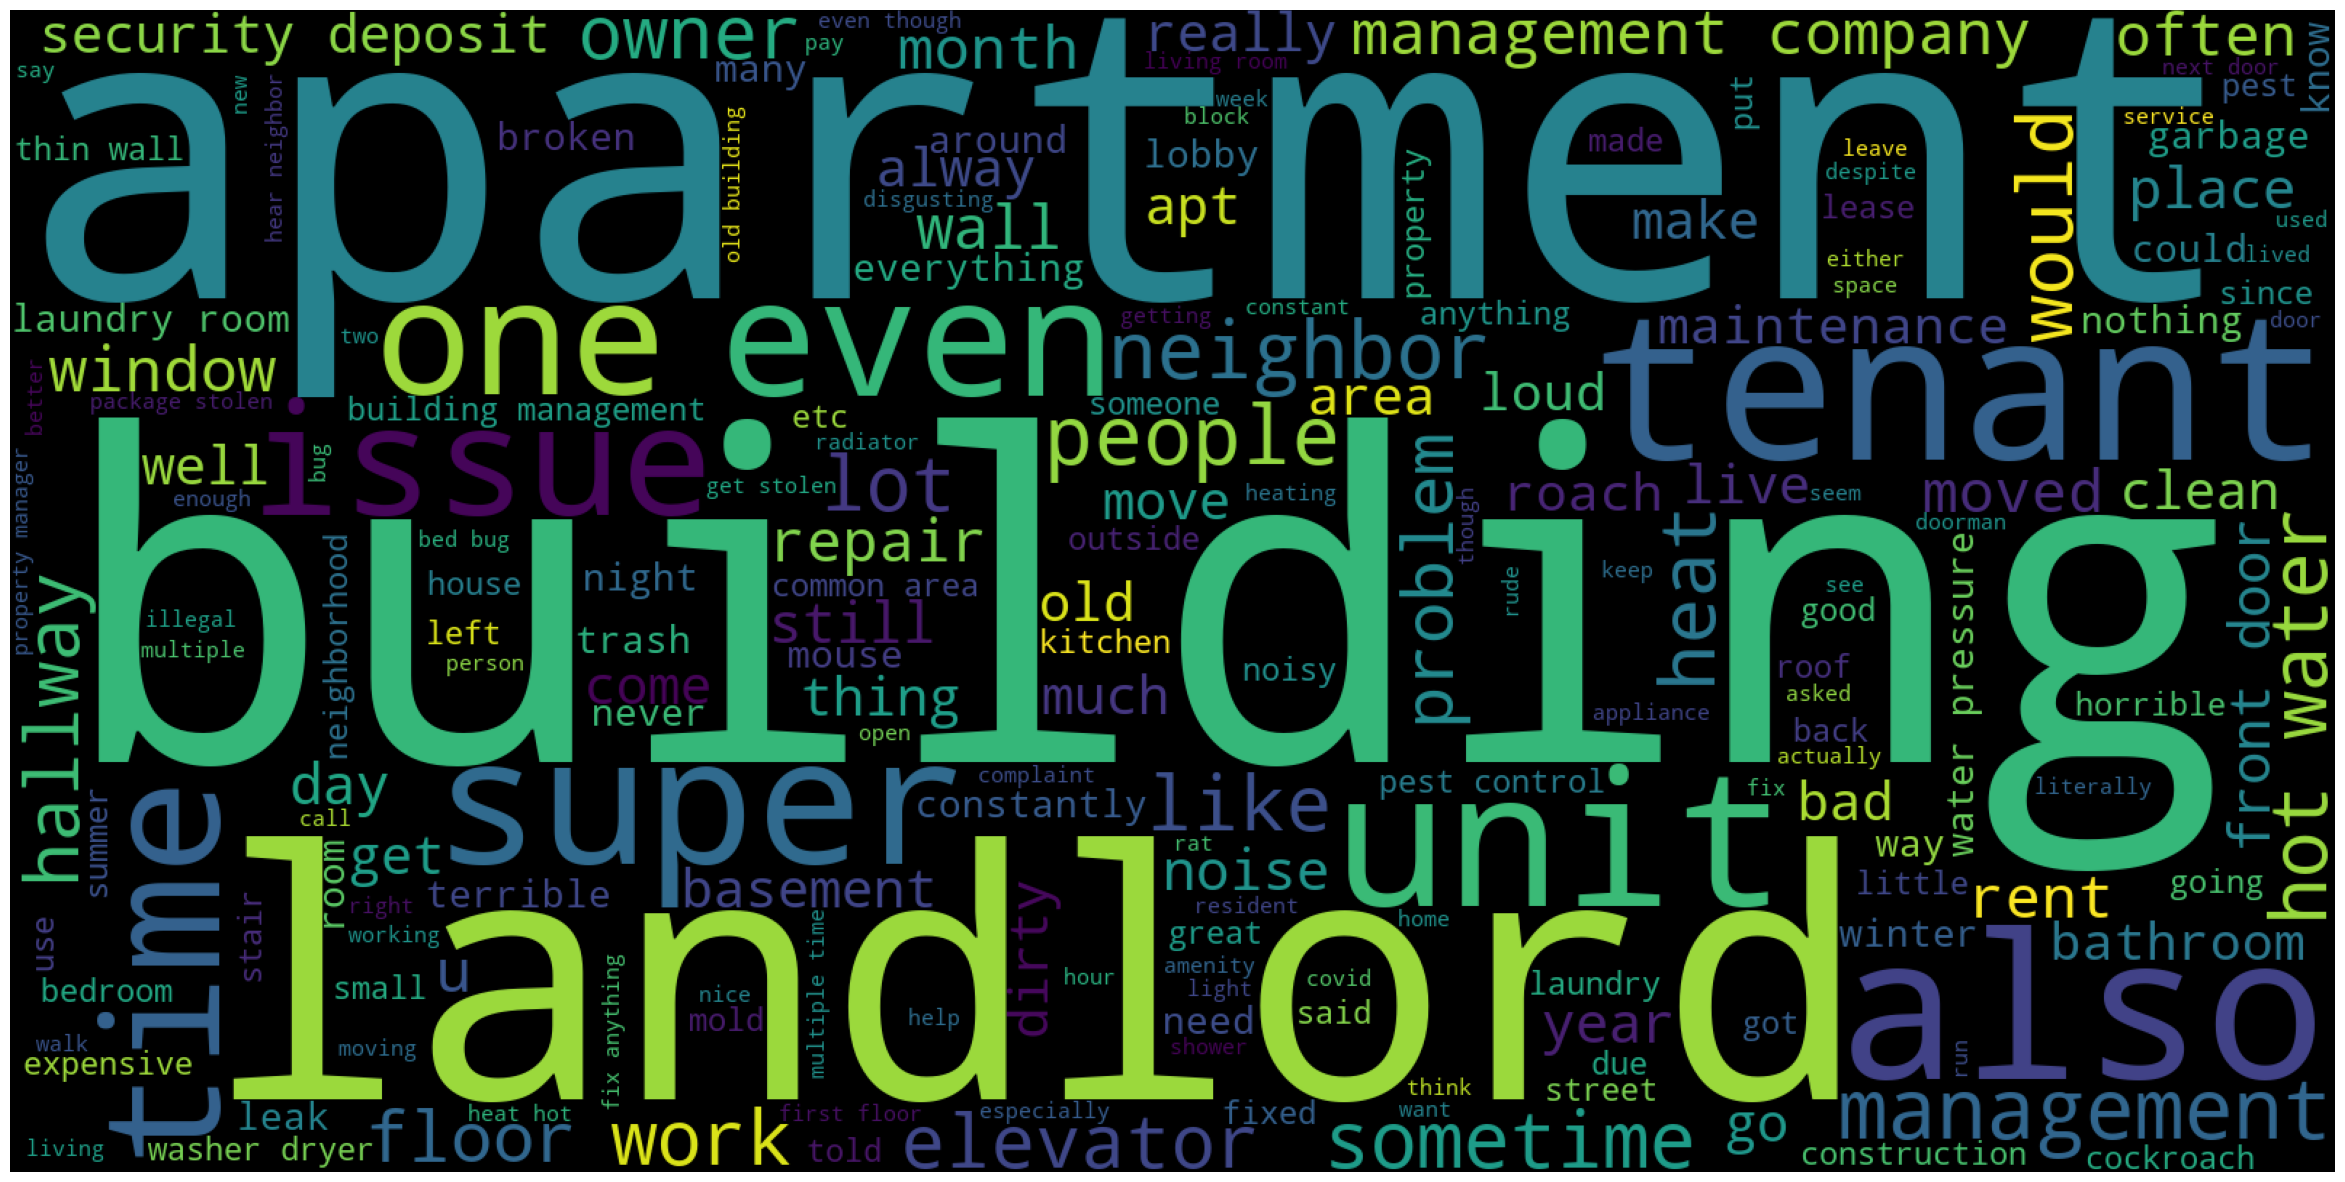

In [42]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

### Converting Text to Numerical vectors - Word2Vec Representation

**Step 1** - Import `Word2Vec` module from `gensim.models`  
**Step 2** - Convert the sentences to the List of Words (i.e. List of Tokens)  
**Step 3** - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.  
**Step 4** - Convert the word vectors to document vectors.

In [43]:
X_train.head()

,Cons,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6,management could responsive nice get ahold,6
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28,use back entrance elevator go service often va...,28
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4,bed bug cockroach ridden,4
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4,mouse infestation horrible management,4
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56,building chronic mess broken lock door lightin...,56


In [44]:
! pip install --upgrade gensim

In [45]:
import gensim

print(gensim.__version__)

4.3.2


In [46]:
from gensim.models import Word2Vec

In [47]:
X_train['tokenised_sentences'] = X_train.clean_text_lemma.apply(lambda sent : sent.split())

X_train.head()

,Cons,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6,management could responsive nice get ahold,6,"[management, could, responsive, nice, get, ahold]"
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28,use back entrance elevator go service often va...,28,"[use, back, entrance, elevator, go, service, o..."
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4,bed bug cockroach ridden,4,"[bed, bug, cockroach, ridden]"
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4,mouse infestation horrible management,4,"[mouse, infestation, horrible, management]"
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56,building chronic mess broken lock door lightin...,56,"[building, chronic, mess, broken, lock, door, ..."


In [48]:
# train model

model = Word2Vec(list(X_train.tokenised_sentences), vector_size=300, min_count=1)

In [49]:
print(model)

Word2Vec<vocab=18341, vector_size=300, alpha=0.025>


In [50]:
# Checking the shape of vectors learned by the model

print(model.wv.__getitem__(model.wv.index_to_key).shape)

(18341, 300)


In [79]:
X_train.tokenised_sentences

47819    [management, could, responsive, nice, get, ahold]
17271    [use, back, entrance, elevator, go, service, o...
48646                        [bed, bug, cockroach, ridden]
52234           [mouse, infestation, horrible, management]
51822    [building, chronic, mess, broken, lock, door, ...
                               ...                        
11284    [bar, across, street, rd, ave, pretty, busy, d...
44732                               [think, bullshit, fly]
38158    [package, stolen, noisy, disruptive, neighbor,...
860      [fire, door, slamming, really, annoying, packa...
15795                             [really, like, building]
Name: tokenised_sentences, Length: 42913, dtype: object

In [81]:
doc=['management', 'could', 'responsive', 'nice', 'get', 'ahold']
vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]

NameError: name 'keyed_vectors' is not defined

In [84]:
vocab_tokens=np.array([])

def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [85]:
X_train.tokenised_sentences.progress_apply(lambda zu : document_vector(zu, model.wv))

  0%|▏                                    | 213/42913 [00:00<00:11, 3730.95it/s]


ValueError: need at least one array to concatenate

In [53]:
X_train.head()

,Cons,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6,management could responsive nice get ahold,6,"[management, could, responsive, nice, get, ahold]"
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28,use back entrance elevator go service often va...,28,"[use, back, entrance, elevator, go, service, o..."
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4,bed bug cockroach ridden,4,"[bed, bug, cockroach, ridden]"
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4,mouse infestation horrible management,4,"[mouse, infestation, horrible, management]"
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56,building chronic mess broken lock door lightin...,56,"[building, chronic, mess, broken, lock, door, ..."


In [54]:
X_train_w2v = list(X_train.doc_vector)

AttributeError: 'DataFrame' object has no attribute 'doc_vector'

### Preprocessing the Test Data

In [60]:
X_test.head()

,Cons
6742,G h j
22239,Extremely dark. Did not get any light
49852,This building is falling apart from elevators ...
3780,Responsiveness to tenant issues
22898,"Thin walls, long time for fixing"


In [61]:
temp_df = X_test['Cons'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|████████████████████████████████████| 10729/10729 [00:14<00:00, 755.51it/s]


,0,1
6742,g h j,3
22239,extremely dark get light,4
49852,building falling apart elevator major rodent i...,7
3780,responsiveness tenant issue,3
22898,thin wall long time fixing,5


In [62]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
6742,g h j,3
22239,extremely dark get light,4
49852,building falling apart elevator major rodent i...,7
3780,responsiveness tenant issue,3
22898,thin wall long time fixing,5


In [63]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,Cons,clean_text_lemma,text_length_lemma
6742,G h j,g h j,3
22239,Extremely dark. Did not get any light,extremely dark get light,4
49852,This building is falling apart from elevators ...,building falling apart elevator major rodent i...,7
3780,Responsiveness to tenant issues,responsiveness tenant issue,3
22898,"Thin walls, long time for fixing",thin wall long time fixing,5


In [64]:
X_test['tokenised_sentences'] = X_test.clean_text_lemma.apply(lambda sent : sent.split())

X_test.head()

,Cons,clean_text_lemma,text_length_lemma,tokenised_sentences
6742,G h j,g h j,3,"[g, h, j]"
22239,Extremely dark. Did not get any light,extremely dark get light,4,"[extremely, dark, get, light]"
49852,This building is falling apart from elevators ...,building falling apart elevator major rodent i...,7,"[building, falling, apart, elevator, major, ro..."
3780,Responsiveness to tenant issues,responsiveness tenant issue,3,"[responsiveness, tenant, issue]"
22898,"Thin walls, long time for fixing",thin wall long time fixing,5,"[thin, wall, long, time, fixing]"


In [65]:
X_test['doc_vector'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

  5%|█▊                                   | 521/10729 [00:00<00:01, 5689.58it/s]


ValueError: need at least one array to concatenate

In [66]:
X_test.head()

,Cons,clean_text_lemma,text_length_lemma,tokenised_sentences
6742,G h j,g h j,3,"[g, h, j]"
22239,Extremely dark. Did not get any light,extremely dark get light,4,"[extremely, dark, get, light]"
49852,This building is falling apart from elevators ...,building falling apart elevator major rodent i...,7,"[building, falling, apart, elevator, major, ro..."
3780,Responsiveness to tenant issues,responsiveness tenant issue,3,"[responsiveness, tenant, issue]"
22898,"Thin walls, long time for fixing",thin wall long time fixing,5,"[thin, wall, long, time, fixing]"


In [67]:
X_test_w2v = list(X_test.doc_vector)

AttributeError: 'DataFrame' object has no attribute 'doc_vector'

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_w2v, y_train)

NameError: name 'X_train_w2v' is not defined

In [69]:
y_test_pred = classifier.predict(X_test_w2v)

NameError: name 'X_test_w2v' is not defined

In [70]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

NameError: name 'y_test_pred' is not defined

### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_w2v, y_train)

NameError: name 'X_train_w2v' is not defined

In [ ]:
y_test_pred = classifier.predict(X_test_w2v)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_w2v, y_train)

RandomForestClassifier()

In [67]:
y_test_pred = classifier.predict(X_test_w2v)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9565217391304348
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       742
        spam       0.93      0.91      0.92       293

    accuracy                           0.96      1035
   macro avg       0.95      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



## Pretrained GloVe for Sentence Vector

In [72]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.3.2
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [73]:
wv = api.load('glove-twitter-50')

# # Approax 200MB Size
# # Save Embeddings
# wv.save('embeddings/50d_glove_vec.kv')

# Load Embeddings
# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('embeddings/50d_glove_vec.kv')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [74]:
# Total number of vocabulary words in pretrained model

len(wv.index_to_key)

1193514

In [75]:
X_train.head()

,Cons,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
47819,Management could be more responsive but they’r...,manag could respons nice get ahold,6,management could responsive nice get ahold,6,"[management, could, responsive, nice, get, ahold]"
17271,"Can’t use the back entrance, elevators go out ...",use back entranc elev go servic often valu goo...,28,use back entrance elevator go service often va...,28,"[use, back, entrance, elevator, go, service, o..."
48646,Bed Bugs & Cockroach Ridden,bed bug cockroach ridden,4,bed bug cockroach ridden,4,"[bed, bug, cockroach, ridden]"
52234,MICE INFESTATION - HORRIBLE MANAGEMENT,mice infest horribl manag,4,mouse infestation horrible management,4,"[mouse, infestation, horrible, management]"
51822,The building is a chronic MESS. From broken l...,build chronic mess broken lock door light inte...,56,building chronic mess broken lock door lightin...,56,"[building, chronic, mess, broken, lock, door, ..."


In [76]:
X_train['doc_vector_pretrained_glove'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

# 20 - 30 mins Run Time

  0%|▏                                     | 213/42913 [00:00<02:10, 326.60it/s]


ValueError: need at least one array to concatenate

In [ ]:
X_train.head()

In [ ]:
X_train_glove_pretrained = list(X_train.doc_vector_pretrained_glove)

In [ ]:
X_test.head()

In [77]:
X_test['doc_vector_pretrained_glove'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

100%|██████████| 1035/1035 [03:38<00:00,  4.74it/s]


In [78]:
X_test_glove_pretrained = list(X_test.doc_vector_pretrained_glove)

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.936231884057971
              precision    recall  f1-score   support

         ham       0.95      0.96      0.96       742
        spam       0.90      0.88      0.89       293

    accuracy                           0.94      1035
   macro avg       0.92      0.92      0.92      1035
weighted avg       0.94      0.94      0.94      1035



### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8840579710144928
              precision    recall  f1-score   support

         ham       0.92      0.92      0.92       742
        spam       0.80      0.78      0.79       293

    accuracy                           0.88      1035
   macro avg       0.86      0.85      0.86      1035
weighted avg       0.88      0.88      0.88      1035



### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.957487922705314
              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       742
        spam       0.95      0.90      0.92       293

    accuracy                           0.96      1035
   macro avg       0.95      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [82]:
X_train.doc_vector.values[1].shape

(300,)

In [83]:
X_train.doc_vector_pretrained_glove.values[1].shape

(50,)

## Pretrained BERT for Sentence Vectors

In [84]:
! pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 4.9 MB 41.8 MB/s 
     |████████████████████████████████| 1.3 MB 56.4 MB/s 
     |████████████████████████████████| 120 kB 74.6 MB/s 
     |████████████████████████████████| 6.6 MB 57.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=89136563d12f03ba8a31d9b7bbca64592851a764baa7f6dd71f45b5e0f01a667
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [85]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [86]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector,doc_vector_pretrained_glove
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648...","[0.18621682, 0.3413227, -0.14527206, -0.200248..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564...","[0.29842275, 0.31679434, -0.077173, -0.2029875..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938...","[-0.027421294, 0.12978429, -0.2759833, 0.08970..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640...","[0.0133334985, 0.09176367, 0.0146043515, -0.19..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022...","[0.31256807, 0.25356603, -0.043327093, 0.19409..."


In [87]:
X_train['doc_vector_pretrained_bert'] = X_train.clean_text_lemma.progress_apply(model.encode)

X_train.head()

100%|██████████| 4136/4136 [00:57<00:00, 71.85it/s]


,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648...","[0.18621682, 0.3413227, -0.14527206, -0.200248...","[-0.030733092, -0.027794827, -0.021859756, 0.0..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564...","[0.29842275, 0.31679434, -0.077173, -0.2029875...","[-0.058491174, 7.522334e-05, 0.05152715, -0.00..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938...","[-0.027421294, 0.12978429, -0.2759833, 0.08970...","[-0.00827709, -0.007367006, -0.06155708, 0.013..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640...","[0.0133334985, 0.09176367, 0.0146043515, -0.19...","[-0.07980399, -0.018068908, -0.02599305, 0.010..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022...","[0.31256807, 0.25356603, -0.043327093, 0.19409...","[-0.0039491476, -0.020886559, -0.0660466, 0.00..."


In [88]:
X_train_bert_pretrained = list(X_train.doc_vector_pretrained_bert)

In [89]:
X_test['doc_vector_pretrained_bert'] = X_test.clean_text_lemma.progress_apply(model.encode)

100%|██████████| 1035/1035 [00:07<00:00, 138.12it/s]


In [90]:
X_test_bert_pretrained = list(X_test.doc_vector_pretrained_bert)

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9710144927536232
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.95      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8985507246376812
              precision    recall  f1-score   support

         ham       0.93      0.93      0.93       742
        spam       0.82      0.82      0.82       293

    accuracy                           0.90      1035
   macro avg       0.87      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035



### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9594202898550724
              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       742
        spam       0.96      0.90      0.93       293

    accuracy                           0.96      1035
   macro avg       0.96      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [94]:
X_train.doc_vector_pretrained_bert.values[1].shape

(384,)

## Visualization for W2V Embeddings

In [95]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648...","[0.18621682, 0.3413227, -0.14527206, -0.200248...","[-0.030733092, -0.027794827, -0.021859756, 0.0..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564...","[0.29842275, 0.31679434, -0.077173, -0.2029875...","[-0.058491174, 7.522334e-05, 0.05152715, -0.00..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938...","[-0.027421294, 0.12978429, -0.2759833, 0.08970...","[-0.00827709, -0.007367006, -0.06155708, 0.013..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640...","[0.0133334985, 0.09176367, 0.0146043515, -0.19...","[-0.07980399, -0.018068908, -0.02599305, 0.010..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022...","[0.31256807, 0.25356603, -0.043327093, 0.19409...","[-0.0039491476, -0.020886559, -0.0660466, 0.00..."


In [107]:
X_train.columns

Index(['text', 'clean_text_stem', 'text_length_stem', 'clean_text_lemma',
       'text_length_lemma', 'tokenised_sentences', 'doc_vector',
       'doc_vector_pretrained_glove', 'doc_vector_pretrained_bert'],
      dtype='object')

In [109]:
w2v_embeddings = np.array(X_train['doc_vector'].tolist())

w2v_embeddings.shape

(4136, 300)

In [121]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

4136

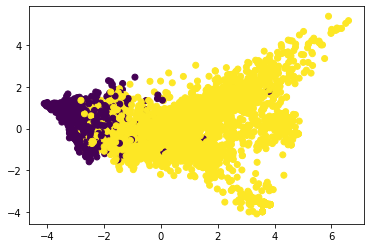

In [120]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(w2v_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


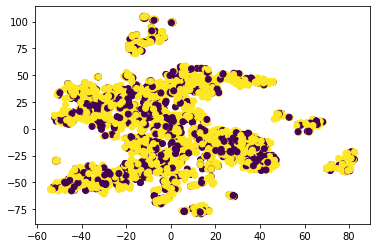

In [126]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

tsne_data = tsne.fit_transform(w2v_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()

## Visualization for Pretrained GloVe Embeddings

In [122]:
X_train.columns

Index(['text', 'clean_text_stem', 'text_length_stem', 'clean_text_lemma',
       'text_length_lemma', 'tokenised_sentences', 'doc_vector',
       'doc_vector_pretrained_glove', 'doc_vector_pretrained_bert'],
      dtype='object')

In [123]:
pretrained_glove_embeddings = np.array(X_train['doc_vector_pretrained_glove'].tolist())

pretrained_glove_embeddings.shape

(4136, 50)

In [124]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

4136

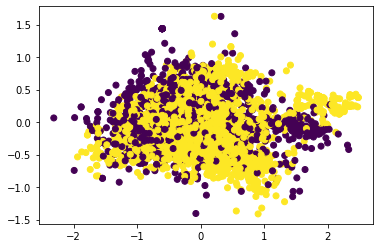

In [125]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_glove_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


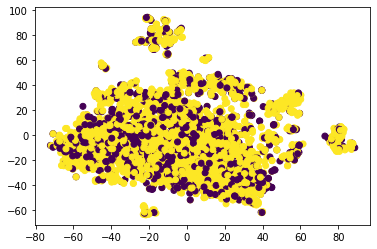

In [127]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

tsne_data = tsne.fit_transform(pretrained_glove_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()

## Visualization for Pretrained BERT Embeddings

In [128]:
X_train.columns

Index(['text', 'clean_text_stem', 'text_length_stem', 'clean_text_lemma',
       'text_length_lemma', 'tokenised_sentences', 'doc_vector',
       'doc_vector_pretrained_glove', 'doc_vector_pretrained_bert'],
      dtype='object')

In [129]:
pretrained_bert_embeddings = np.array(X_train['doc_vector_pretrained_bert'].tolist())

pretrained_bert_embeddings.shape

(4136, 384)

In [130]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

4136

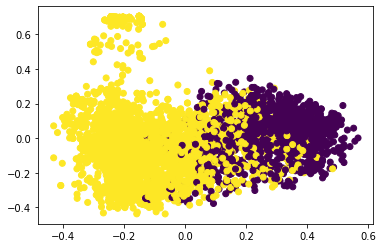

In [131]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_bert_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


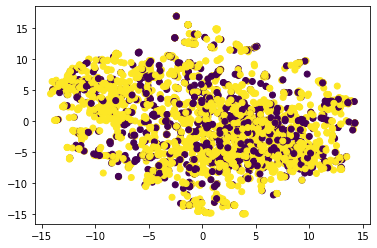

In [140]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=300)

tsne_data = tsne.fit_transform(pretrained_bert_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()